In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
data.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [4]:
newColumns = {'% Iron Feed' : 'ironfeed', '% Silica Feed': 'silicafeed', 'Starch Flow': 'starchflow', 'Amina Flow': 'animaflow',
       'Ore Pulp Flow': 'orepulpflow', 'Ore Pulp pH': 'orepulp_ph', 'Ore Pulp Density': 'orepulpdensity',
              '% Iron Concentrate': 'iron_concentrate','% Silica Concentrate': 'silica_concentrate'}
data.rename(columns = newColumns, inplace = True)

variables = ['ironfeed','silicafeed','starchflow', 'animaflow',
       'orepulpflow', 'orepulp_ph', 'orepulpdensity','iron_concentrate', 'silica_concentrate']

data =data[variables]

data.head()

,ironfeed,silicafeed,starchflow,animaflow,orepulpflow,orepulp_ph,orepulpdensity,iron_concentrate,silica_concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","66,91","1,31"


In [5]:
def transform(a):
        newval = a.replace("," , ".")
        return newval
    

In [6]:
data['ironfeed'] = data['ironfeed'].apply(transform).astype(float)
data['silicafeed'] = data['silicafeed'].apply(transform).astype(float)
data['orepulp_ph'] = data['orepulp_ph'].apply(transform).astype(float)
data['orepulpdensity'] = data['orepulpdensity'].apply(transform).astype(float)
data['iron_concentrate'] = data['iron_concentrate'].apply(transform).astype(float)
data['silica_concentrate'] = data['silica_concentrate'].apply(transform).astype(float)

In [7]:
data['starchflow'] = data['starchflow'].apply(transform).astype(float)
data['animaflow'] = data['animaflow'].apply(transform).astype(float)
data['orepulpflow'] = data['orepulpflow'].apply(transform).astype(float)


In [8]:
def convert(a):
    return a*1000
data['orepulpdensity'] = data['orepulpdensity'].apply(convert)

data.head()

,ironfeed,silicafeed,starchflow,animaflow,orepulpflow,orepulp_ph,orepulpdensity,iron_concentrate,silica_concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1740.0,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1740.0,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1740.0,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1740.0,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1740.0,66.91,1.31


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ironfeed            737453 non-null  float64
 1   silicafeed          737453 non-null  float64
 2   starchflow          737453 non-null  float64
 3   animaflow           737453 non-null  float64
 4   orepulpflow         737453 non-null  float64
 5   orepulp_ph          737453 non-null  float64
 6   orepulpdensity      737453 non-null  float64
 7   iron_concentrate    737453 non-null  float64
 8   silica_concentrate  737453 non-null  float64
dtypes: float64(9)
memory usage: 50.6 MB


In [205]:
from sklearn.model_selection import train_test_split

In [206]:
features = ['ironfeed', 'silicafeed', 'starchflow', 'animaflow',
       'orepulpflow', 'orepulp_ph', 'orepulpdensity','iron_concentrate']

X = data[features]
y = data['silica_concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [207]:
X_train.shape

(663707, 8)

In [208]:
X_test.shape

(73746, 8)

In [209]:
import matplotlib.pyplot as plt

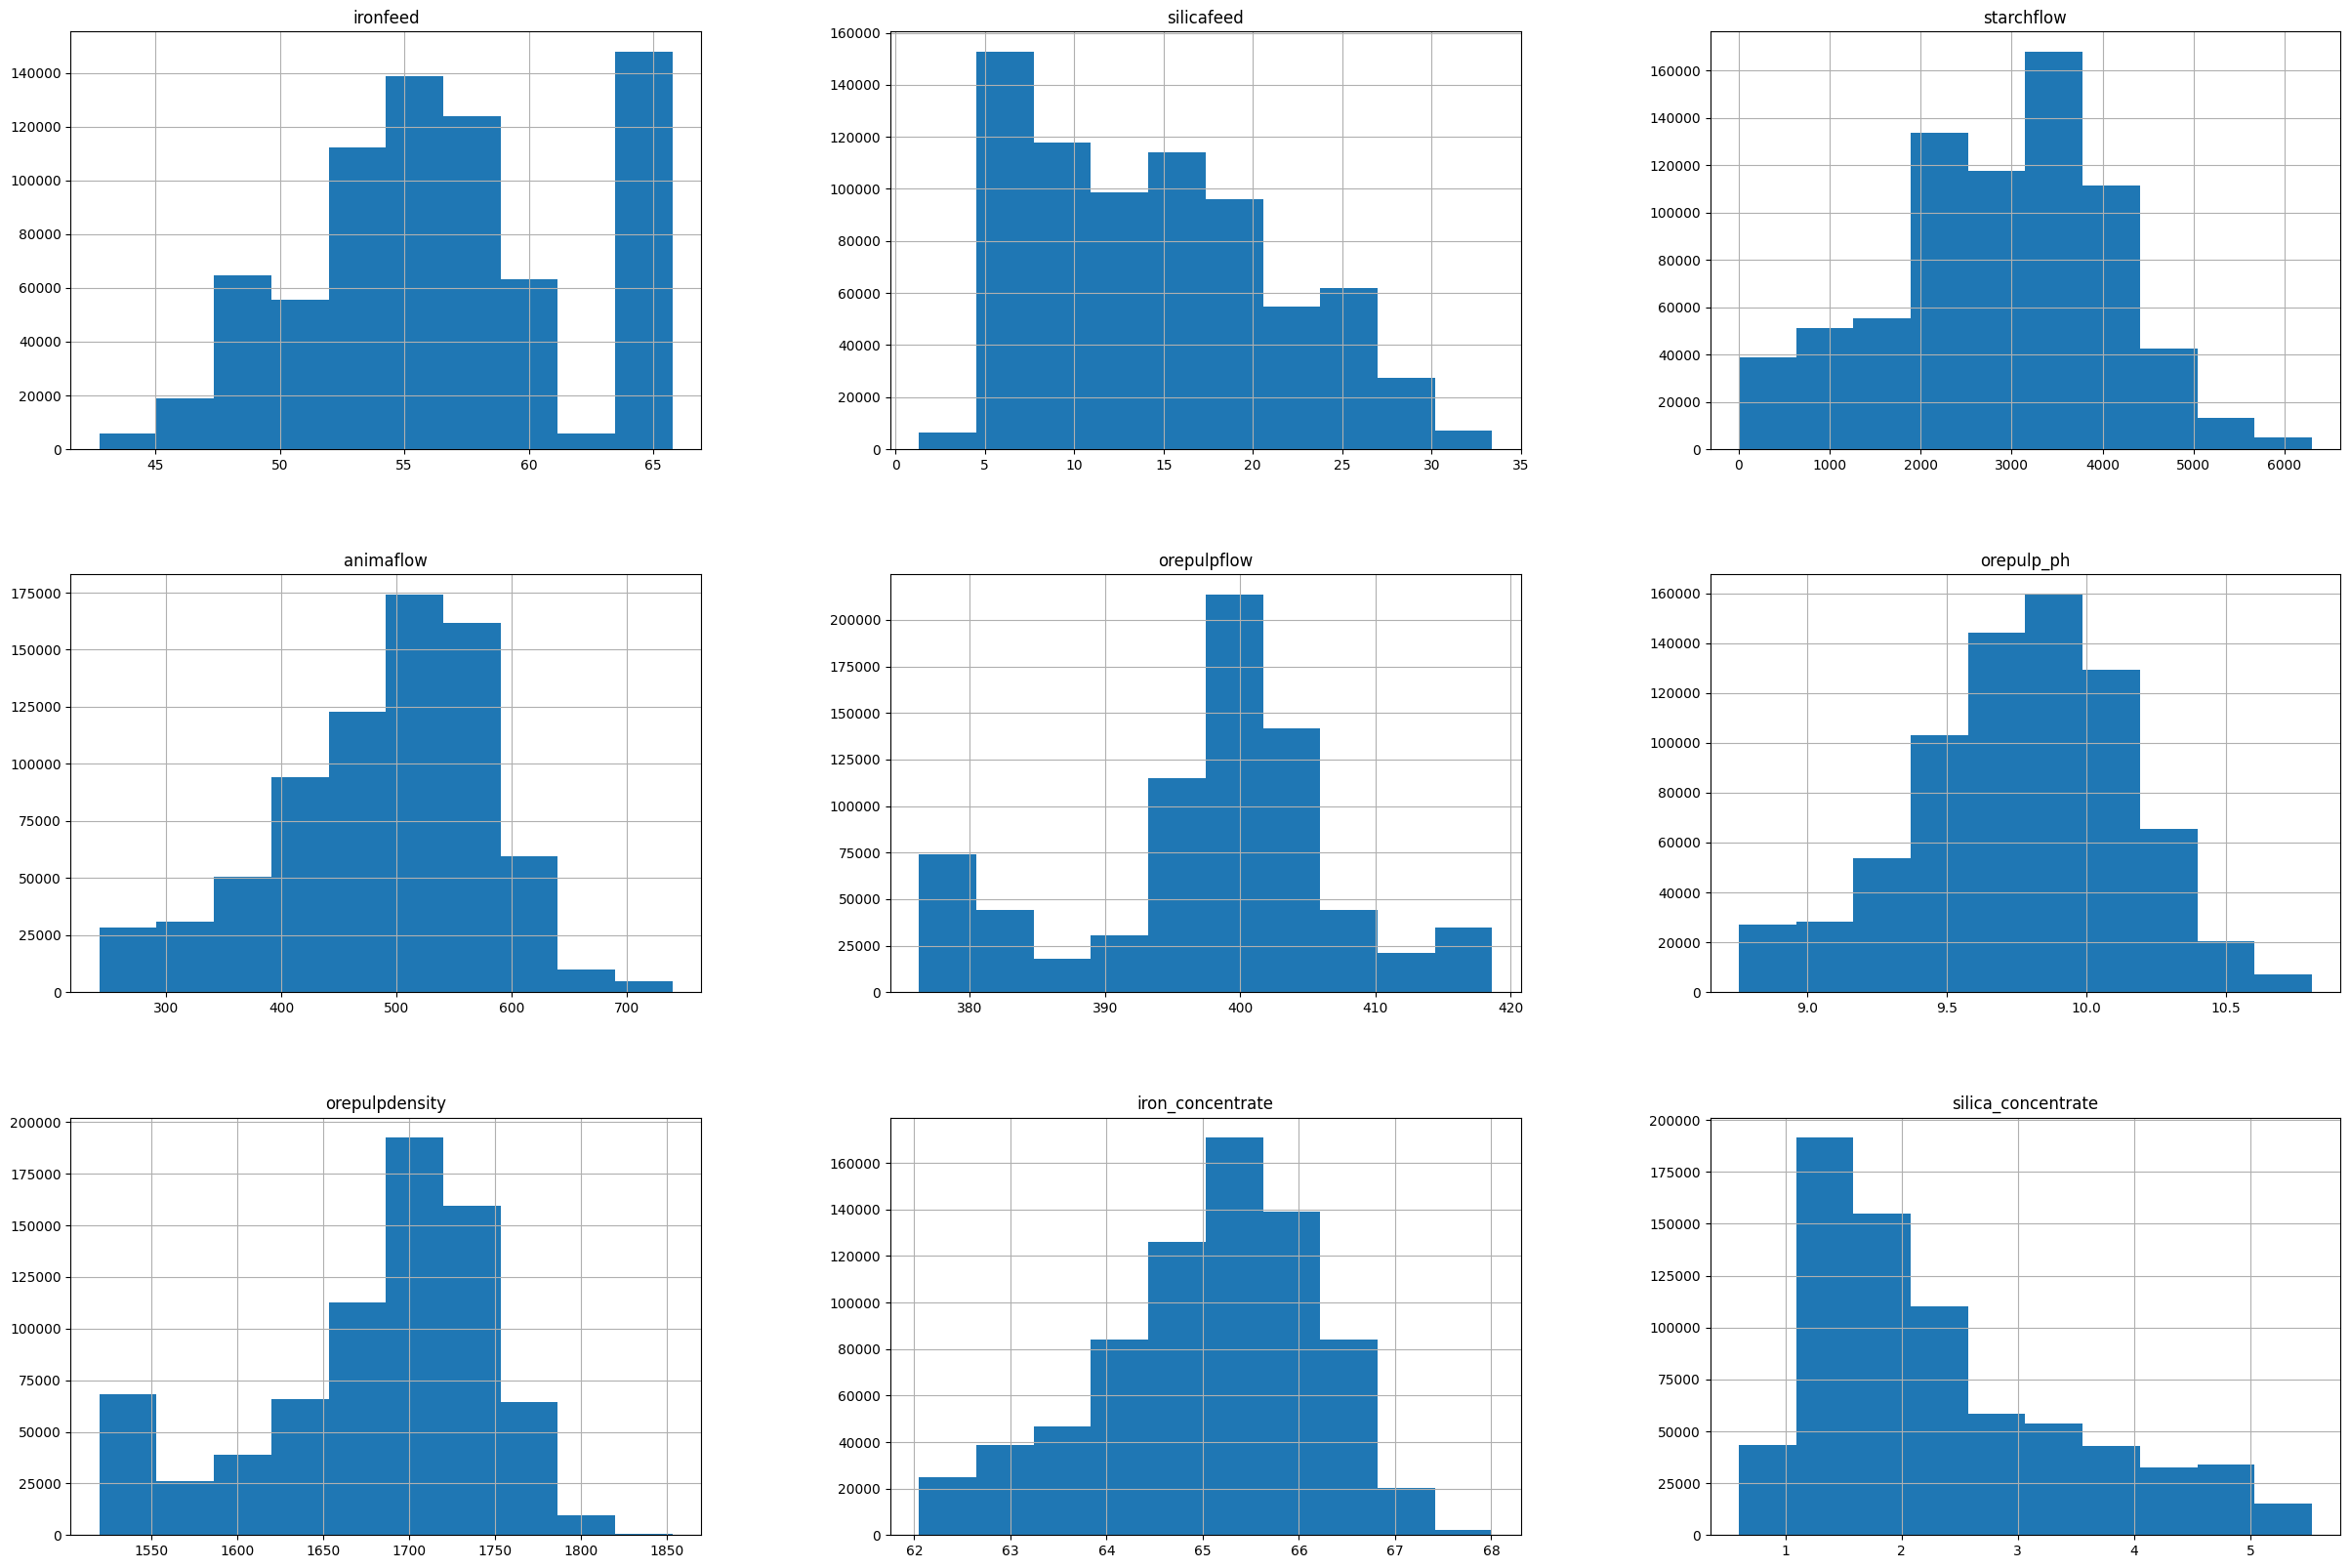

In [210]:
data.hist(figsize = (30,20))
plt.show()

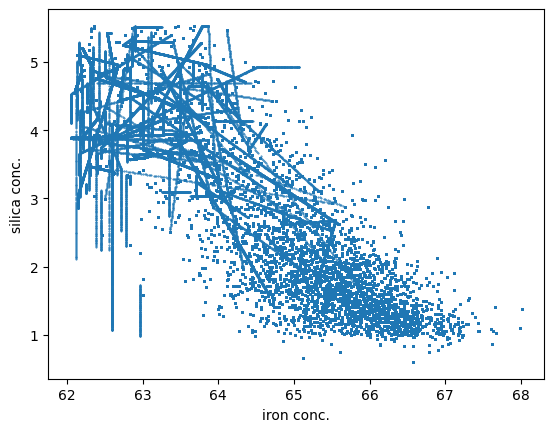

-0.8005600028647533


In [211]:
plt.scatter(X_train['iron_concentrate'], y_train, s = 0.2)
plt.xlabel("iron conc.")
plt.ylabel("silica conc.")
plt.show()

ironconc_silicaconc_corr = y.corr(X['iron_concentrate'])
print(ironconc_silicaconc_corr) # Very strong negative correlation

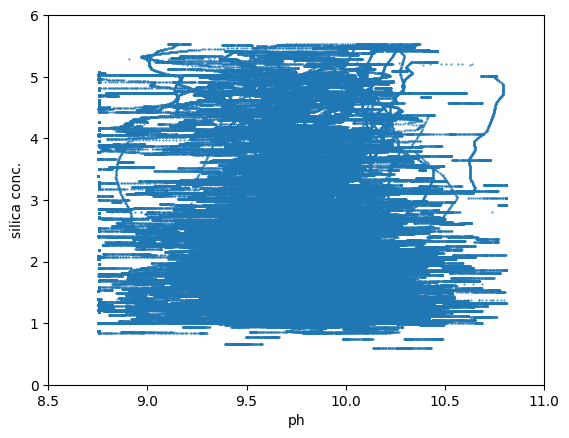

In [212]:
plt.scatter(X_train['orepulp_ph'], y_train,s=0.2)
plt.xlabel("ph")
plt.xlim(8.5,11)
plt.ylabel("silica conc.")
plt.ylim(0,6)
plt.show()

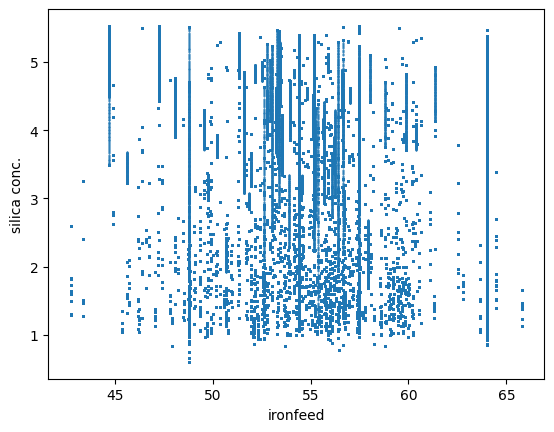

In [261]:
plt.scatter(X_train['ironfeed'], y_train, s = 0.2)
plt.xlabel("ironfeed")
plt.ylabel("silica conc.")
plt.show()

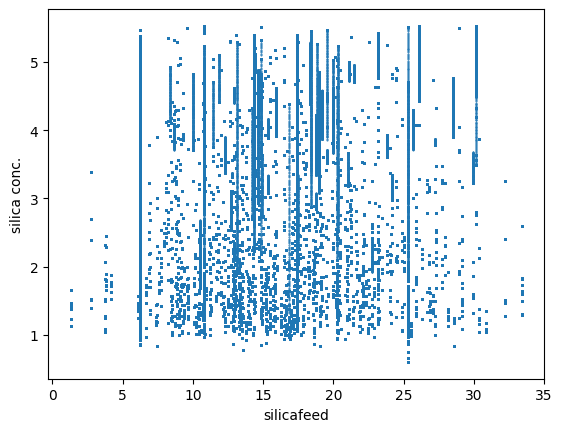

In [260]:
plt.scatter(X_train['silicafeed'], y_train, s = 0.2)
plt.xlabel("silicafeed")
plt.ylabel("silica conc.")
plt.show()

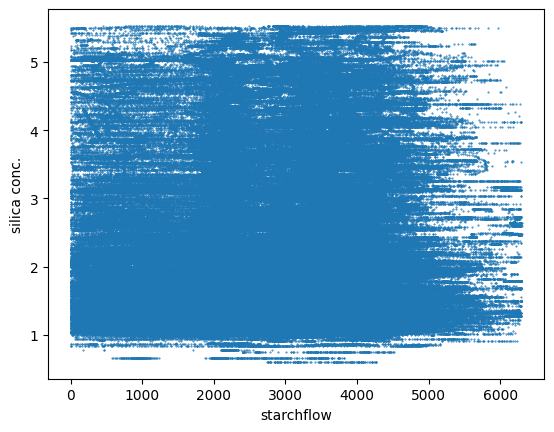

In [259]:
plt.scatter(X_train['starchflow'], y_train, s = 0.2)
plt.xlabel("starchflow")
plt.ylabel("silica conc.")
plt.show()

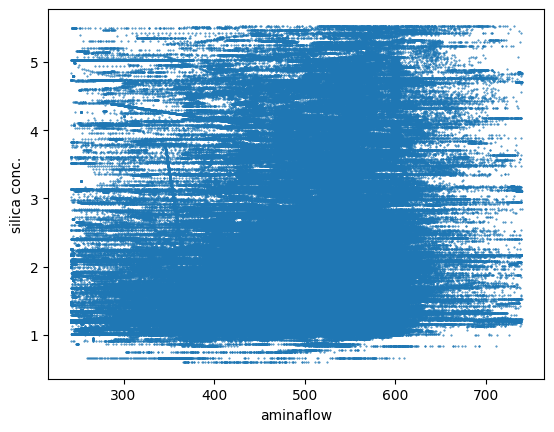

In [258]:
plt.scatter(X_train['animaflow'], y_train, s = 0.2)
plt.xlabel("aminaflow")
plt.ylabel("silica conc.")
plt.show()

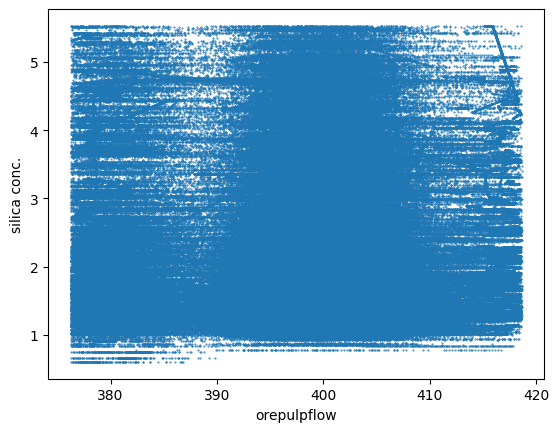

In [257]:
plt.scatter(X_train['orepulpflow'], y_train, s = 0.2)
plt.xlabel("orepulpflow")
plt.ylabel("silica conc.")
plt.show()

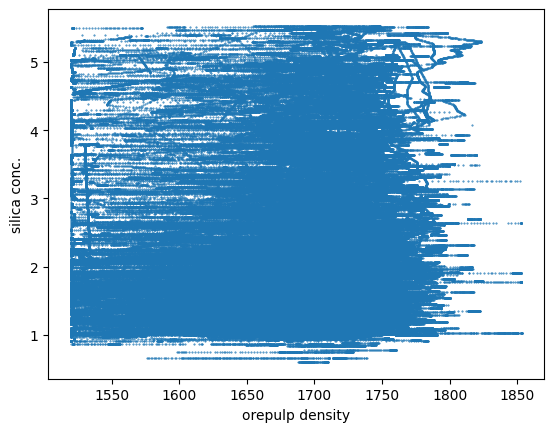

In [256]:
plt.scatter(X_train['orepulpdensity'], y_train, s = 0.2)
plt.xlabel("orepulp density")
plt.ylabel("silica conc.")
plt.show()

In [213]:
silica_ph_corr = y.corr(X['orepulp_ph'])
print(silica_ph_corr)  #weak negative correlation

-0.14773914057828683


In [214]:
starchflow_silica_corr = y.corr(X['starchflow'])
print(starchflow_silica_corr) # weak negative correlation


# Higher the starch flow, lower is the impurity(silica) in the ore

-0.0663936278335671


In [215]:
ironfeed_silica_corr = y.corr(X['ironfeed'])
print(ironfeed_silica_corr) # weak negative correlation

-0.07705226303390078


In [216]:
silicafeed_silica_corr = y.corr(X['silicafeed'])
print(silicafeed_silica_corr) # weak positive correlation

0.07272412704346877


In [217]:
amina_silica_corr = y.corr(X['animaflow'])
print(amina_silica_corr) # weak positive correlation

0.15670140674080546


In [219]:
orepulpdensity_silica_corr = y.corr(X["orepulpdensity"])
print(orepulpdensity_silica_corr) # weak positive linear relation

0.04698351582009636


In [220]:
orepulpflow_silica_corr = y.corr(X["orepulpflow"])
print(orepulpflow_silica_corr) #very weak linear correlation 

0.008221889588188949


In [221]:
orepulpflow_iron_corr = X['iron_concentrate'].corr(X["orepulpflow"])
print(orepulpflow_iron_corr) #very weak positive linear correlation 

0.08311999619407473


In [222]:
orepulpPH_iron_corr = X['iron_concentrate'].corr(X["orepulp_ph"])
print(orepulpPH_iron_corr) # weak positivelinear correlation 

0.19299165017610737


In [223]:
aminaflow_starch_corr = X['starchflow'].corr(X["animaflow"])
print(aminaflow_starch_corr) #weak positive linear correlation 

0.25474838263165744


In [224]:
from sklearn.linear_model import LinearRegression

In [225]:
model = LinearRegression()

In [228]:
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_predict = model.predict(X_test)

In [230]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(rmse)

0.6612827034729031


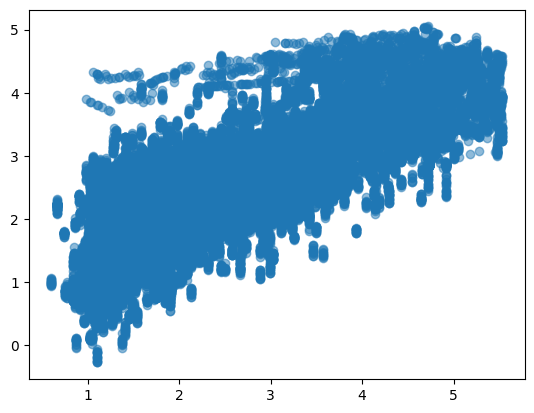

In [268]:
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.show()

In [232]:
from sklearn.preprocessing import PolynomialFeatures

In [233]:
degree = 2
poly_features = PolynomialFeatures(degree = degree, include_bias = False)

In [234]:
X_train_poly = poly_features.fit_transform(X_train)

In [235]:
linearReg = LinearRegression()
linearReg.fit(X_train_poly, y_train)

LinearRegression()

In [236]:
X_test_poly = poly_features.fit_transform(X_test)
y_test_pred = linearReg.predict(X_test_poly)

In [237]:
mse_poly = mean_squared_error(y_test, y_test_pred)

In [238]:
print(mse_poly)

0.3979344747791782


In [239]:
rmse = np.sqrt(mse_poly)
print(rmse)

0.6308204774570798


In [240]:
# checking for overefitting

y_cap = model.predict(X_train)

In [241]:
mse = mean_squared_error(y_train, y_cap)
rmse = np.sqrt(mse)
print(rmse)

0.6629315745271591


In [242]:
from sklearn.metrics import r2_score

In [243]:
r2_train = r2_score(y_predict, y_test)
print(r2_train)

0.46846386018918584


In [244]:
# trying to tune the hyperparameters in order to fit data better

In [245]:
#Ridge regression

In [246]:
from sklearn.linear_model import Ridge

ridge = linear_model.Ridge(alpha = 990)
ridge.fit(X_train, y_train)

Ridge(alpha=990)

In [247]:
print(ridge.coef_)

[ 1.70650657e-02  1.93747460e-02 -2.83030554e-05  3.68291545e-04
  8.65008594e-03 -1.19750859e-02  7.11349127e-04 -8.04186613e-01]


In [248]:
ridge.intercept_

48.77830608508031

In [249]:
y_pred_ridge = ridge.predict(X_test)

In [250]:
mse_ridge =  mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(rmse_ridge)


r2_ridge = r2_score(y_test, y_pred_ridge)
r2_ridge

0.6612857922181625


0.6541891652261639

In [251]:
# feature engineering
newFeatures= ['animaflow',
       'orepulpflow', 'orepulp_ph']

X_test_new = X_test[newFeatures]
X_train_new = X_train[newFeatures]

X_test_new.info()
X_train_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73746 entries, 198870 to 386521
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animaflow    73746 non-null  float64
 1   orepulpflow  73746 non-null  float64
 2   orepulp_ph   73746 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 663707 entries, 141608 to 121958
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   animaflow    663707 non-null  float64
 1   orepulpflow  663707 non-null  float64
 2   orepulp_ph   663707 non-null  float64
dtypes: float64(3)
memory usage: 20.3 MB


In [252]:
model_3 = LinearRegression()

In [253]:
model_3.fit(X_train_new, y_train)

LinearRegression()

In [254]:
y_pred3 = model_3.predict(X_test_new)

In [255]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
rmse

1.0922853257942116

In [10]:
data2 = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv") 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [11]:
data2.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [12]:
features2 = ['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level']
data2_y = data2['% Silica Concentrate']
data2 = data2[features2]

In [288]:
data2_y.head()
data2.head()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,"249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344"
1,"249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075"
2,"249,741","247,874","250,313","295,096","306,4","251,345","248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567"
3,"249,917","254,487","250,049","295,096","306,4","250,422","251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669"
4,"250,203","252,136","249,895","295,096","306,4","249,983","248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679"


In [289]:
data2['Flotation Column 01 Air Flow'] = data2['Flotation Column 01 Air Flow'].apply(transform).astype(float)
data2['Flotation Column 02 Air Flow'] = data2['Flotation Column 02 Air Flow'].apply(transform).astype(float)
data2['Flotation Column 03 Air Flow'] = data2['Flotation Column 03 Air Flow'].apply(transform).astype(float)
data2['Flotation Column 04 Air Flow'] = data2['Flotation Column 04 Air Flow'].apply(transform).astype(float)
data2['Flotation Column 05 Air Flow'] = data2['Flotation Column 05 Air Flow'].apply(transform).astype(float)
data2['Flotation Column 06 Air Flow'] = data2['Flotation Column 06 Air Flow'].apply(transform).astype(float)
data2['Flotation Column 07 Air Flow'] = data2['Flotation Column 07 Air Flow'].apply(transform).astype(float)

data2['Flotation Column 01 Level'] = data2['Flotation Column 01 Level'].apply(transform).astype(float)
data2['Flotation Column 02 Level'] = data2['Flotation Column 02 Level'].apply(transform).astype(float)
data2['Flotation Column 03 Level'] = data2['Flotation Column 03 Level'].apply(transform).astype(float)
data2['Flotation Column 04 Level'] = data2['Flotation Column 04 Level'].apply(transform).astype(float)
data2['Flotation Column 05 Level'] = data2['Flotation Column 05 Level'].apply(transform).astype(float)
data2['Flotation Column 06 Level'] = data2['Flotation Column 06 Level'].apply(transform).astype(float)
data2['Flotation Column 07 Level'] = data2['Flotation Column 07 Level'].apply(transform).astype(float)


In [291]:
data2_y = data2_y.apply(transform).astype(float)

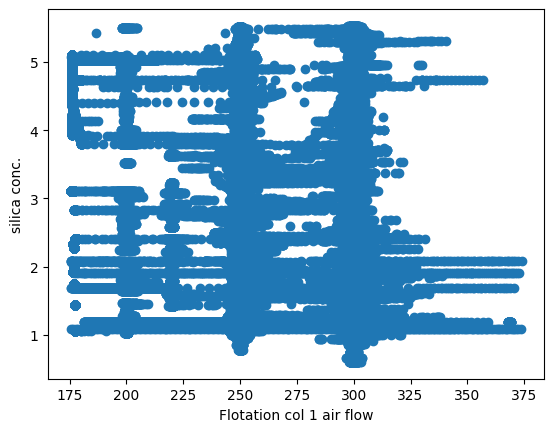

-0.21915829359209232


In [294]:
plt.scatter(data2['Flotation Column 01 Air Flow'], data2_y)
plt.xlabel("Flotation col 1 air flow")
plt.ylabel("silica conc.")
plt.show()

silica_airCol1_corr = data2_y.corr(data2['Flotation Column 01 Air Flow'])
print(silica_airCol1_corr) #weak negative linear correlation

In [301]:
silica_airCol2_corr = data2_y.corr(data2['Flotation Column 02 Air Flow'])
print(silica_airCol2_corr) #weak negative linear correlation

-0.16739750985224247


In [302]:
silica_airCol3_corr = data2_y.corr(data2['Flotation Column 03 Air Flow'])
print(silica_airCol3_corr) #weak negative linear correlation

-0.21889077890306746


In [305]:
silica_airCol4_corr = data2_y.corr(data2['Flotation Column 04 Air Flow'])
print(silica_airCol4_corr) #Very weak negative linear correlation

-0.005010915982634921


In [306]:
silica_airCol5_corr = data2_y.corr(data2['Flotation Column 05 Air Flow'])
print(silica_airCol5_corr) #Very weak negative linear correlation

-0.009292647175197484


In [308]:
silica_airCol6_corr = data2_y.corr(data2['Flotation Column 06 Air Flow'])
print(silica_airCol6_corr) #Very weak negative linear correlation

-0.04965036864190471


In [310]:
silica_airCol7_corr = data2_y.corr(data2['Flotation Column 07 Air Flow'])
print(silica_airCol7_corr) #Very weak negative linear correlation

-0.07177566373351353


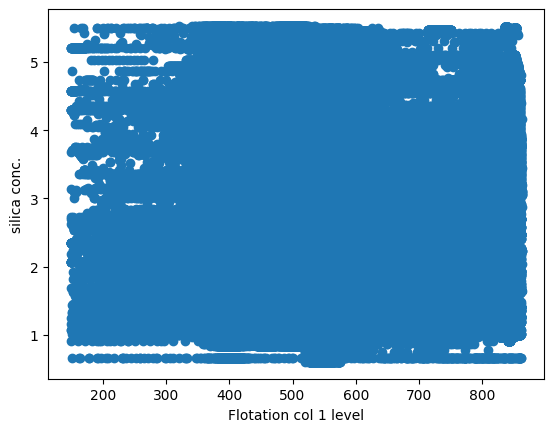

0.017217250156148296


In [313]:
plt.scatter(data2['Flotation Column 01 Level'], data2_y)
plt.xlabel("Flotation col 1 level")
plt.ylabel("silica conc.")
plt.show()

silica_levCol1_corr = data2_y.corr(data2['Flotation Column 01 Level'])
print(silica_levCol1_corr) #weak positive linear correlation

In [314]:
silica_levCol2_corr = data2_y.corr(data2['Flotation Column 02 Level'])
print(silica_levCol2_corr) #weak positive linear correlation

0.030955327290552965


In [315]:
silica_levCol3_corr = data2_y.corr(data2['Flotation Column 03 Level'])
print(silica_levCol3_corr) #weak positive linear correlation

0.014245715232621716


In [317]:
silica_levCol4_corr = data2_y.corr(data2['Flotation Column 04 Level'])
print(silica_levCol4_corr) #weak negative linear correlation

-0.14945575575460565


In [319]:
silica_levCol5_corr = data2_y.corr(data2['Flotation Column 05 Level'])
print(silica_levCol5_corr) #weak negative linear correlation

-0.1691697889695779


In [321]:
silica_levCol6_corr = data2_y.corr(data2['Flotation Column 06 Level'])
print(silica_levCol6_corr) #weak negative linear correlation

-0.10244296388804357


In [323]:
silica_levCol7_corr = data2_y.corr(data2['Flotation Column 07 Level'])
print(silica_levCol7_corr) #weak negative linear correlation

-0.1413871657157363


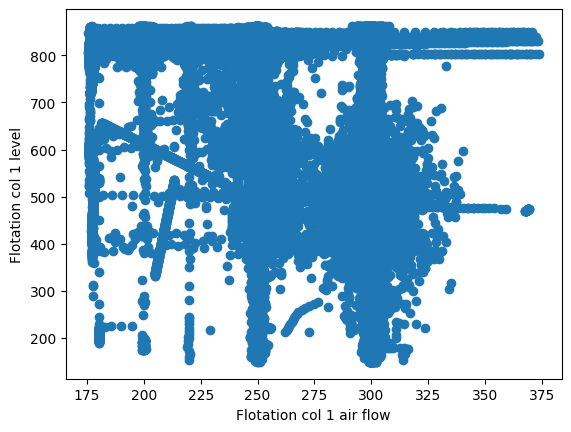

-0.441573314513214


In [325]:
plt.scatter(data2['Flotation Column 01 Air Flow'], data2['Flotation Column 01 Level'])
plt.xlabel("Flotation col 1 air flow")
plt.ylabel("Flotation col 1 level")
plt.show()


airCol1_levCol1_corr = data2['Flotation Column 01 Air Flow'].corr(data2['Flotation Column 01 Level'])
print(airCol1_levCol1_corr) #moderate negative linear correlation

In [326]:
airCol1_levCol2_corr = data2['Flotation Column 01 Air Flow'].corr(data2['Flotation Column 02 Level'])
print(airCol1_levCol2_corr) #moderate negative linear correlation

-0.42575796333582433


In [327]:
airCol1_levCol3_corr = data2['Flotation Column 01 Air Flow'].corr(data2['Flotation Column 03 Level'])
print(airCol1_levCol3_corr) #moderate negative linear correlation

-0.3717910088555265


In [329]:
airCol2_levCol1_corr = data2['Flotation Column 02 Air Flow'].corr(data2['Flotation Column 01 Level'])
print(airCol2_levCol1_corr) #moderate negative linear correlation

-0.4320325934549876


In [335]:
data2.columns
#data.columns
#plt.figure(figsize=(40, 30))
#hMap = sns.heatmap(data2.corr(), annot=True)

Index(['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
      dtype='object')

In [336]:
data.columns

Index(['ironfeed', 'silicafeed', 'starchflow', 'animaflow', 'orepulpflow',
       'orepulp_ph', 'orepulpdensity', 'iron_concentrate',
       'silica_concentrate'],
      dtype='object')

In [345]:
combined_data = pd.merge(data,data2, left_index = True, right_index = True)

In [346]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ironfeed                      737453 non-null  float64
 1   silicafeed                    737453 non-null  float64
 2   starchflow                    737453 non-null  float64
 3   animaflow                     737453 non-null  float64
 4   orepulpflow                   737453 non-null  float64
 5   orepulp_ph                    737453 non-null  float64
 6   orepulpdensity                737453 non-null  float64
 7   iron_concentrate              737453 non-null  float64
 8   silica_concentrate            737453 non-null  float64
 9   Flotation Column 01 Air Flow  737453 non-null  float64
 10  Flotation Column 02 Air Flow  737453 non-null  float64
 11  Flotation Column 03 Air Flow  737453 non-null  float64
 12  Flotation Column 04 Air Flow  737453 non-nul

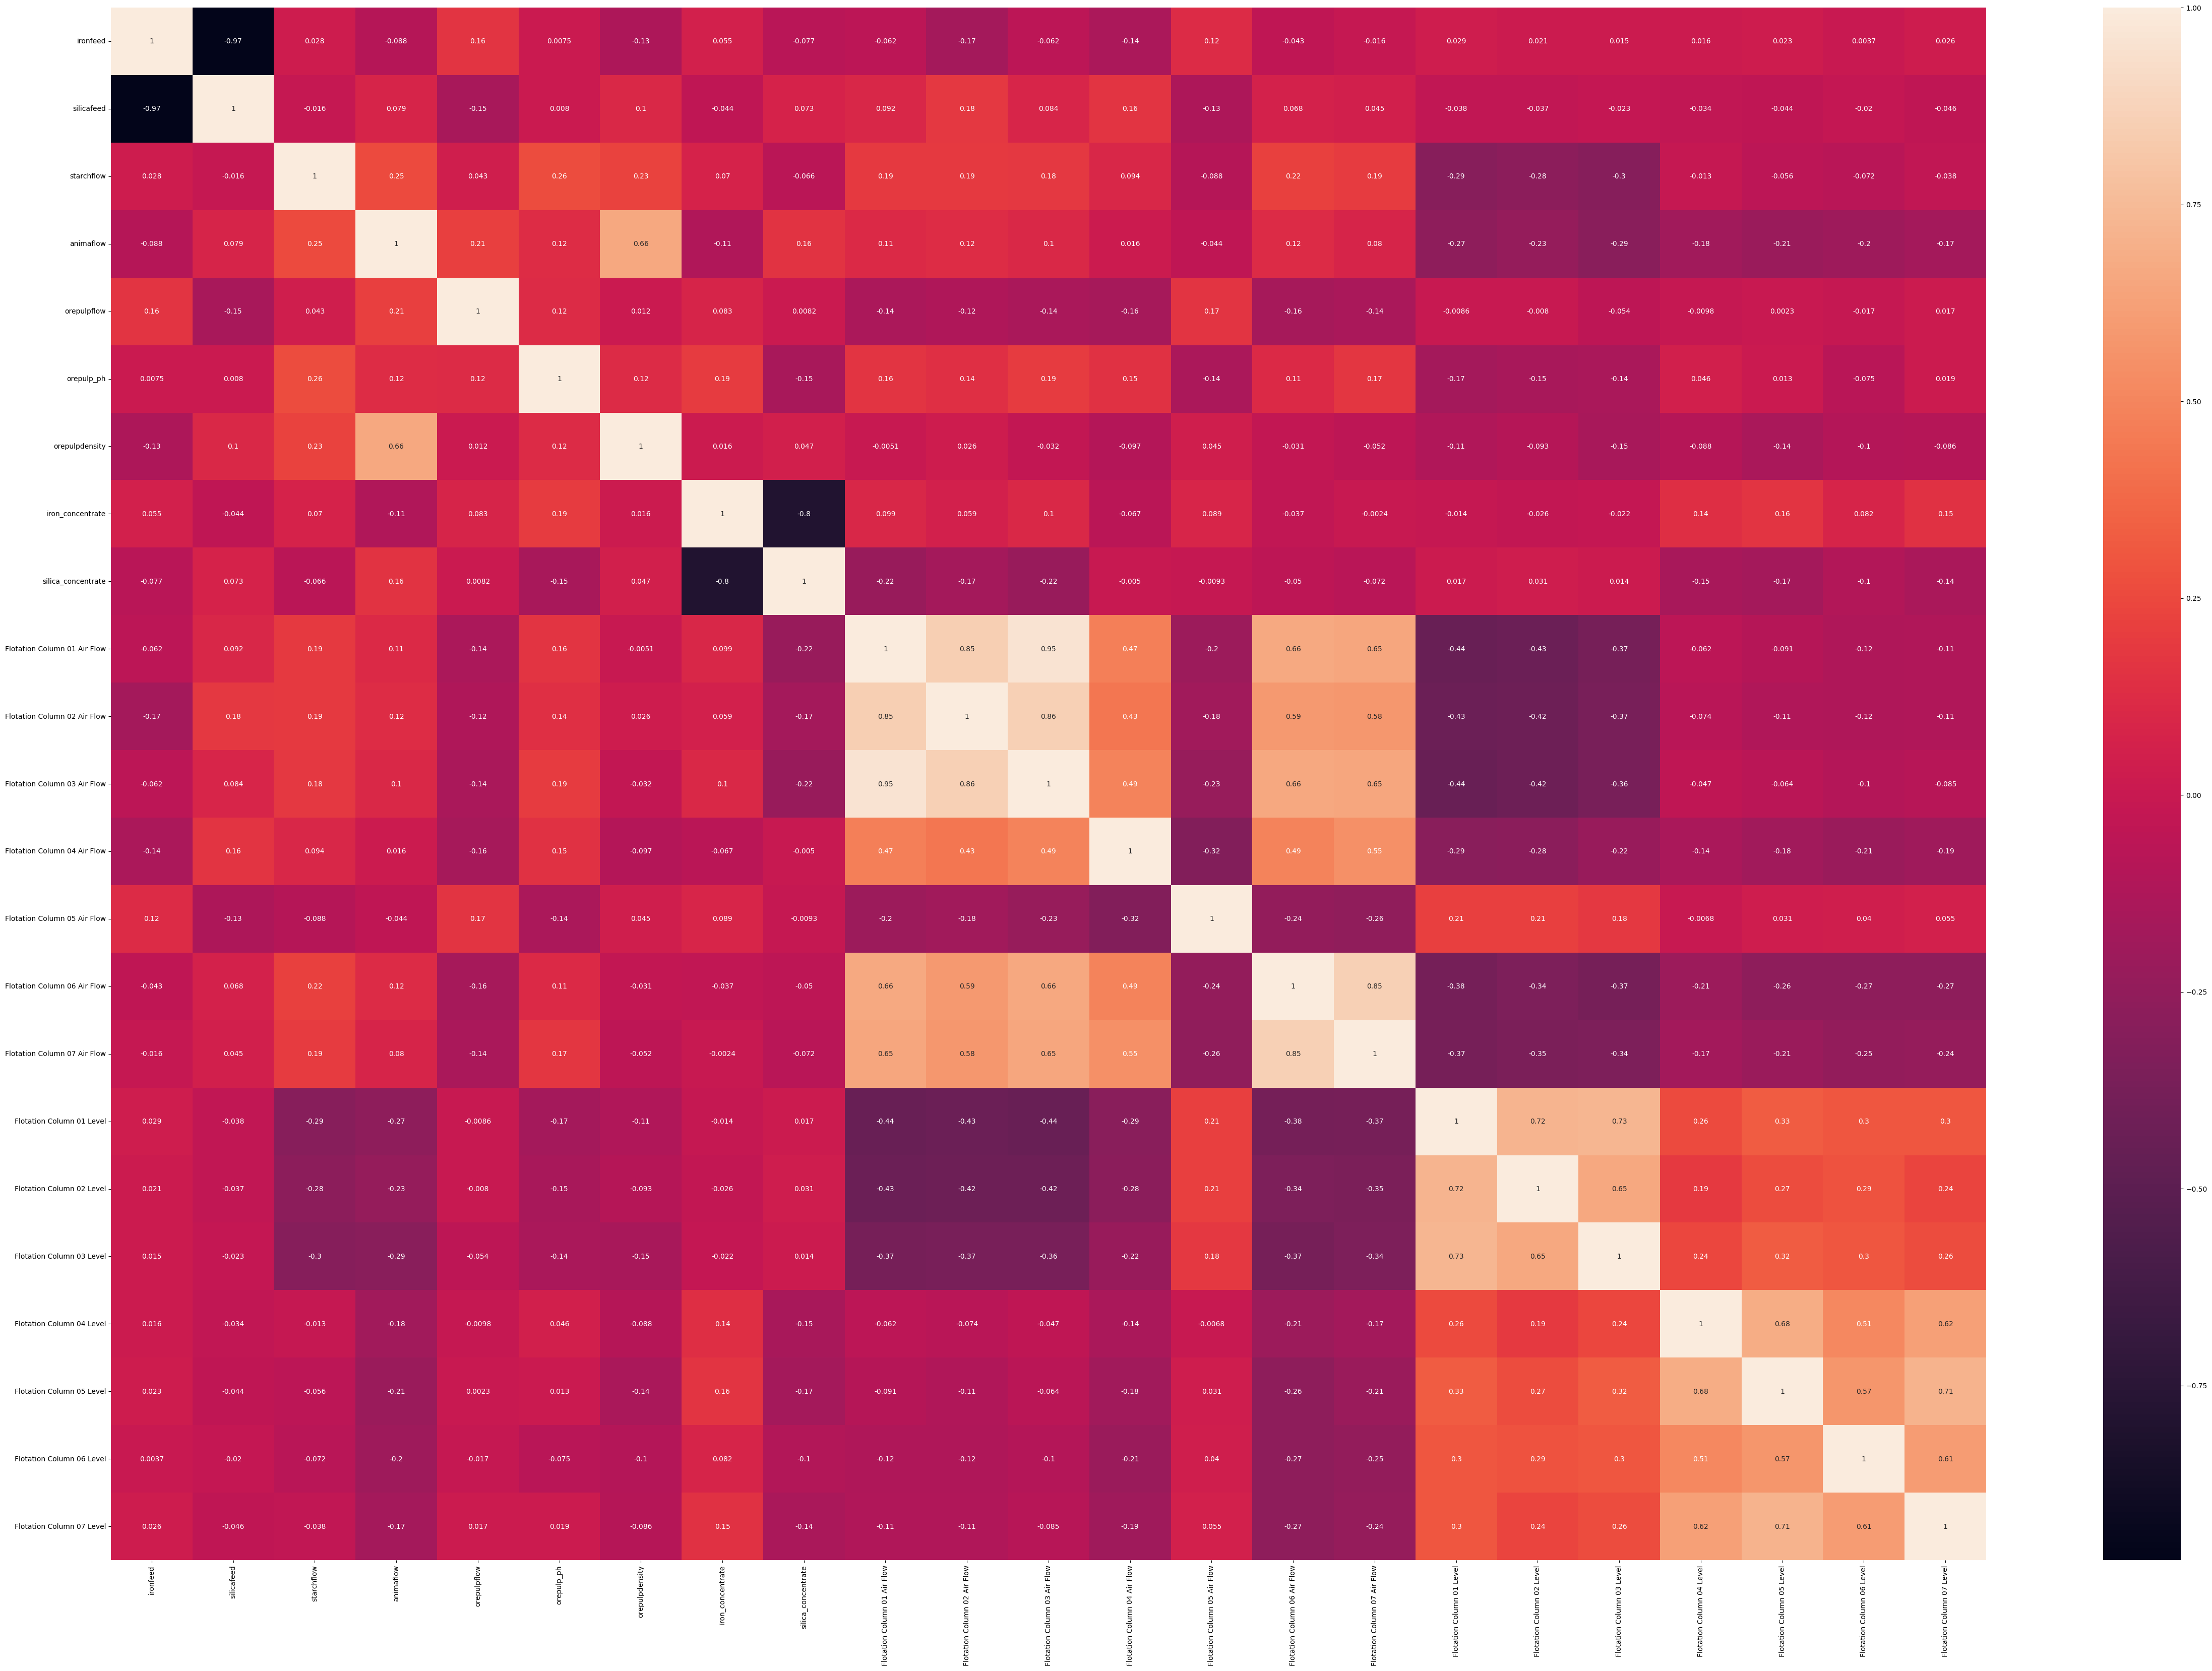

In [348]:
plt.figure(figsize=(60, 40))
hMap = sns.heatmap(combined_data.corr(), annot=True)

In [349]:
#looking at the heatmap of correlation, the most correlated features are: flotation column 1 air flow,flotation column2 air flow
#flotation column 3 air flow,
# iron concentrate, ore pulp ph,floation col level 4, 5,6,7
combined_data.columns

Index(['ironfeed', 'silicafeed', 'starchflow', 'animaflow', 'orepulpflow',
       'orepulp_ph', 'orepulpdensity', 'iron_concentrate',
       'silica_concentrate', 'Flotation Column 01 Air Flow',
       'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
       'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow',
       'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
       'Flotation Column 01 Level', 'Flotation Column 02 Level',
       'Flotation Column 03 Level', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 06 Level',
       'Flotation Column 07 Level'],
      dtype='object')

In [350]:
imp_features = ['ironfeed','silicafeed', 'starchflow', 'animaflow', 'orepulpflow','orepulpdensity','Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow',
       'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow','Flotation Column 01 Level', 'Flotation Column 02 Level',
       'Flotation Column 03 Level']

In [359]:
final_data = combined_data[imp_features]
final_data.head()

,ironfeed,silicafeed,starchflow,animaflow,orepulpflow,orepulpdensity,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level
0,55.2,16.98,3019.53,557.434,395.713,1740.0,295.096,306.4,250.225,250.884,457.396,432.962,424.954
1,55.2,16.98,3024.41,563.965,397.383,1740.0,295.096,306.4,250.137,248.994,451.891,429.560,432.939
2,55.2,16.98,3043.46,568.054,399.668,1740.0,295.096,306.4,251.345,248.071,451.240,468.927,434.610
3,55.2,16.98,3047.36,568.665,397.939,1740.0,295.096,306.4,250.422,251.147,452.441,458.165,442.865
4,55.2,16.98,3033.69,558.167,400.254,1740.0,295.096,306.4,249.983,248.928,452.441,452.900,450.523


In [360]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(final_data,y, test_size = 0.1, random_state = 42)

In [355]:
model_final = LinearRegression()

In [365]:
model_final.fit(X_train_final, y_train_final)

LinearRegression()

In [366]:
y_predict_final = model_final.predict(X_test_final)

In [367]:
r2sc = r2_score(y_test_final, y_predict_final)
r2sc

0.05524718723665867

In [369]:
mse_final = mean_squared_error(y_test_final, y_predict_final)
mse_final

1.1946975724717737

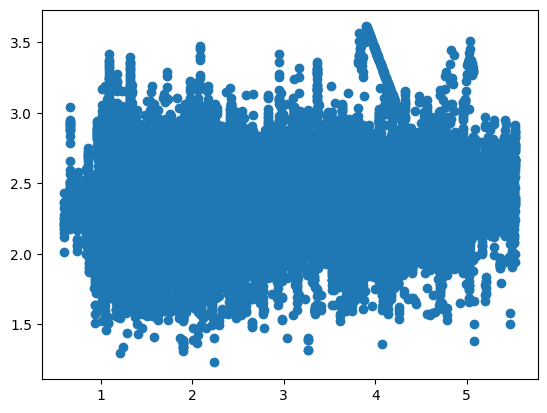

In [375]:
plt.scatter(y_test_final, y_predict_final)
plt.show()

In [389]:
# to optimize using SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

In [386]:
sgdReg = SGDRegressor(loss='squared_error', penalty = 'l2', alpha=0.0001, max_iter = 1000)
sgdReg.fit(X_train_final_scaled, y_train_final)

SGDRegressor()

In [387]:
y_pred_sgd = sgdReg.predict(X_test_final_scaled)

In [388]:
mse_sgd = mean_squared_error(y_test_final, y_pred_sgd)
mse_sgd

1.1970380104563199

In [390]:
ridge_model = Ridge(alpha = 0.0001)

In [391]:
ridge_model.fit(X_train_final_scaled, y_train_final)

Ridge()

In [392]:
y_predict_ridge = ridge_model.predict(X_test_final_scaled)

In [393]:
mse_ridge = mean_squared_error(y_test_final, y_predict_ridge)
mse_ridge

1.19469756433435